Training

In [1]:
from types import SimpleNamespace
import wandb, torch
from ddpm_conditional import *

In [2]:
config

namespace(run_name='DDPM_conditional',
          epochs=100,
          noise_steps=1000,
          seed=42,
          batch_size=10,
          img_size=64,
          num_classes=10,
          dataset_path=Path('datasets/cifar10_64/cifar10-64'),
          train_folder='train',
          val_folder='test',
          device='cuda',
          slice_size=1,
          do_validation=True,
          fp16=True,
          log_every_epoch=10,
          num_workers=10,
          lr=0.005)

In [3]:
config.noise_steps = 100
config.epochs = 10
config.slice_size = 100
config.use_wandb = True
config.dataset_artifact = '945096249-sjtu-hpc-center/train_sd/CIFAR10_64:v0'
config.log_every_epoch = 5

In [4]:
diff = Diffusion(noise_steps=config.noise_steps, img_size=64, num_classes=10)

wandb: [wandb.login()] Loaded credentials for https://api.wandb.ai from /home/estar/.netrc.
wandb: Currently logged in as: 945096249 (945096249-sjtu-hpc-center) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


/home/estar/TZ/AI-L/MY_GM/Diffusion-Models-Train/ddpm_conditional.py:159: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.scaler = torch.cuda.amp.GradScaler()


01:37:38 - INFO: Starting epoch 0:


01:37:46 - INFO: Sampling 10 new images....


01:37:52 - INFO: Sampling 10 new images....


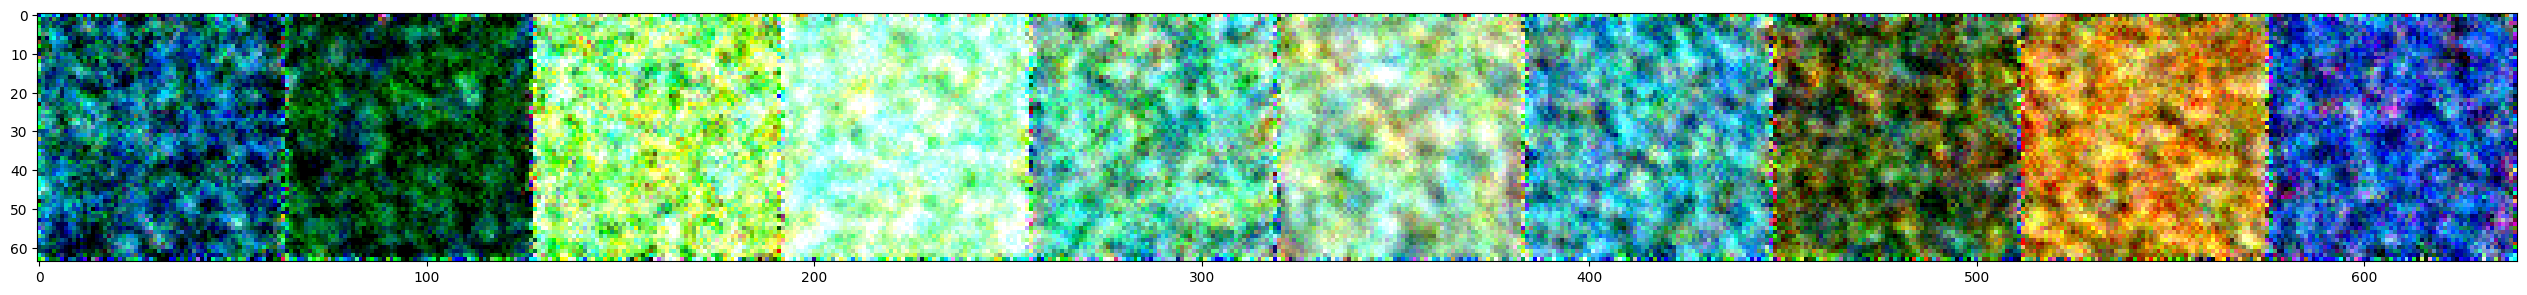

01:37:58 - INFO: Starting epoch 1:


01:38:06 - INFO: Starting epoch 2:


01:38:13 - INFO: Starting epoch 3:


01:38:20 - INFO: Starting epoch 4:


01:38:27 - INFO: Starting epoch 5:


01:38:34 - INFO: Sampling 10 new images....


01:38:40 - INFO: Sampling 10 new images....


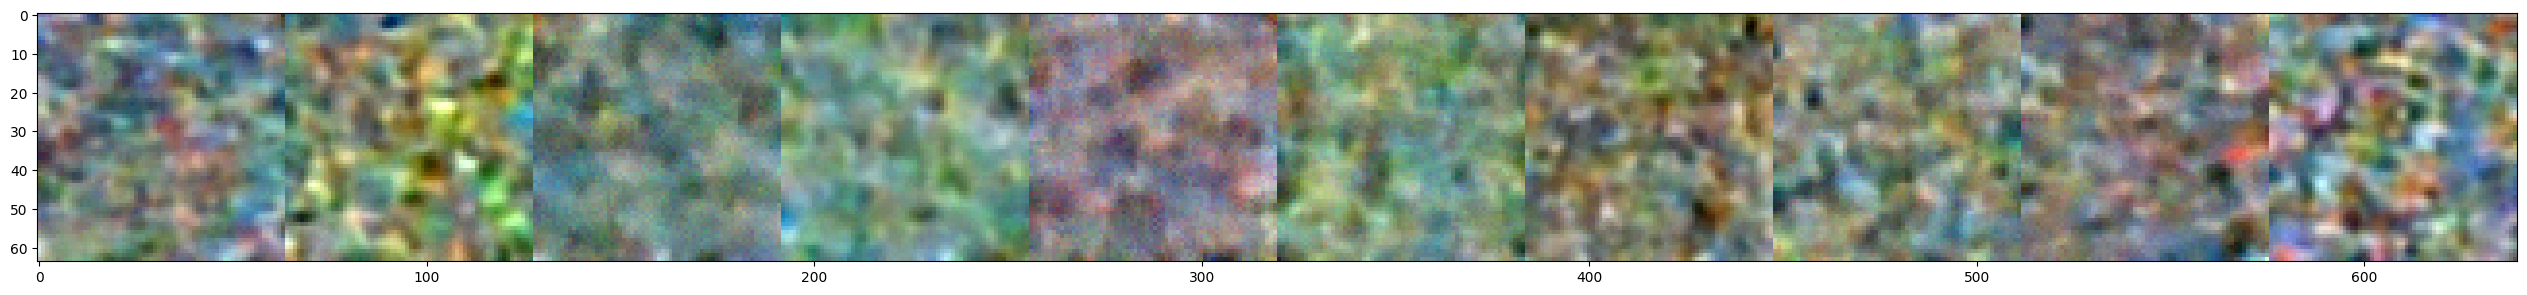

01:38:47 - INFO: Starting epoch 6:


01:38:54 - INFO: Starting epoch 7:


01:39:01 - INFO: Starting epoch 8:


01:39:08 - INFO: Starting epoch 9:


wandb: Adding directory to artifact (models/DDPM_conditional)... Done. 1.1s


learning_rate,▁▂▃▄▅▇▇██████████▇▇▇▇▆▆▆▆▅▅▄▄▃▃▂▂▂▂▁▁▁▁▁
train_mse,█▆▆▄▃▂▃▂▃▂▁▂▁▂▁▁▁▁▂▁▁▁▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▂▁
val_mse,█▅▃▂▂▁▁▁▁▁
learning_rate,0.0
train_mse,0.06926
val_mse,2.37686


In [5]:
with wandb.init(project="train_sd", group="train", config=config):
    wandb.use_artifact(config.dataset_artifact, type='dataset')
    diff.prepare(config)
    diff.fit(config)

In [6]:
config

namespace(run_name='DDPM_conditional',
          epochs=10,
          noise_steps=100,
          seed=42,
          batch_size=10,
          img_size=64,
          num_classes=10,
          dataset_path=Path('datasets/cifar10_64/cifar10-64'),
          train_folder='train',
          val_folder='test',
          device='cuda',
          slice_size=100,
          do_validation=True,
          fp16=True,
          log_every_epoch=5,
          num_workers=10,
          lr=0.005,
          use_wandb=True,
          dataset_artifact='945096249-sjtu-hpc-center/train_sd/CIFAR10_64:v0')